# Street network figure-ground diagrams

Author: [Geoff Boeing](https://geoffboeing.com/)

Use OSMnx to download square-mile city street networks and visualize them as figure-ground diagrams. Discussed in this [blog post](http://geoffboeing.com/2017/01/square-mile-street-network-visualization/).

  - [Documentation](https://osmnx.readthedocs.io/)
  - [Journal article and citation info](https://geoffboeing.com/publications/osmnx-paper/)
  - [Code repository](https://github.com/gboeing/osmnx)
  - [Examples gallery](https://github.com/gboeing/osmnx-examples)

In [27]:
import osmnx as ox
from IPython.display import Image

ox.__version__

'2.0.2'

## Part I: create diagrams by passing in lat-long points

In [28]:
def plot_point(
    place: str,
    point: tuple[float, float],
    network_type: str = "drive",
    default_width: float = 4,
) -> str:
    img_folder = "images"
    extension = "png"
    dpi = 40
    fp = f"./{img_folder}/{place}.{extension}"
    G = ox.graph.graph_from_point(
        point, dist=1000, network_type=network_type, truncate_by_edge=True
    )
    fig, ax = ox.plot.plot_figure_ground(
        G=G,
        dist=805,
        default_width=default_width,
        filepath=fp,
        dpi=dpi,
        save=True,
        show=False,
        close=True,
    )
    return fp

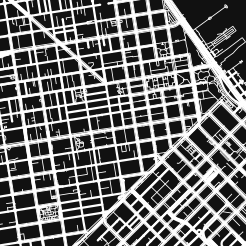

In [29]:
fp = plot_point("sf", (37.793897, -122.402189), "all")
Image(fp)

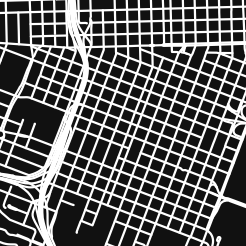

In [30]:
fp = plot_point("portland", (45.517309, -122.682138))
Image(fp)

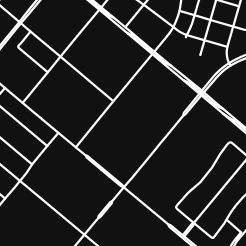

In [31]:
fp = plot_point("irvine", (33.694981, -117.841375))
Image(fp)

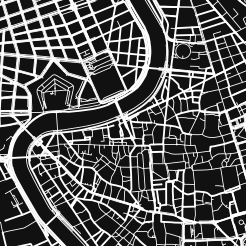

In [32]:
fp = plot_point("rome", (41.901336, 12.471831), "all", default_width=3.3)
Image(fp)

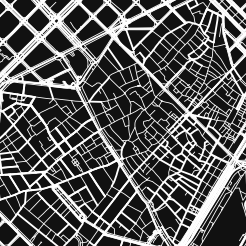

In [33]:
fp = plot_point("barcelona_gothic", (41.382850, 2.174192), "all", default_width=3.3)
Image(fp)

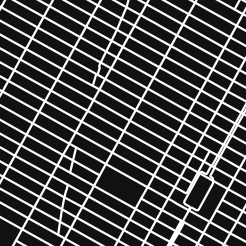

In [34]:
fp = plot_point("manhattan", (40.757920, -73.983393))
Image(fp)

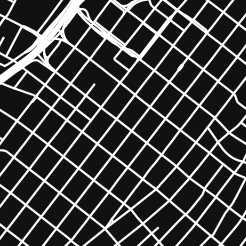

In [35]:
fp = plot_point("los_angeles", (34.047404, -118.253146))
Image(fp)

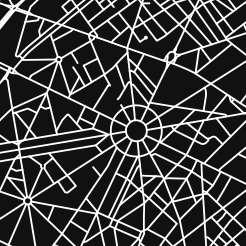

In [36]:
fp = plot_point("paris", (48.873702, 2.294136), "drive", 3.3)
Image(fp)

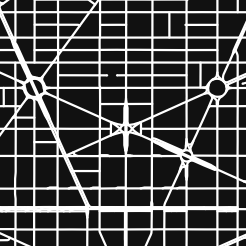

In [37]:
fp = plot_point("dc", (38.907919, -77.036552))
Image(fp)

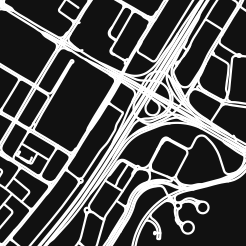

In [38]:
fp = plot_point("dubai1", (25.203143, 55.270007))
Image(fp)

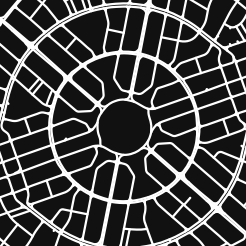

In [39]:
fp = plot_point("dubai2", (25.056565, 55.207924))
Image(fp)

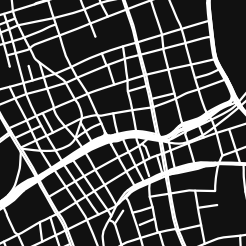

In [40]:
fp = plot_point("shanghai", (31.234696, 121.481170))
Image(fp)

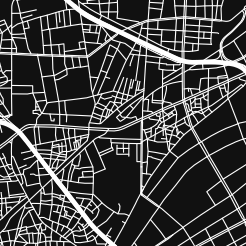

In [41]:
fp = plot_point("osaka", (34.694834, 135.484761), "drive", 2)
Image(fp)

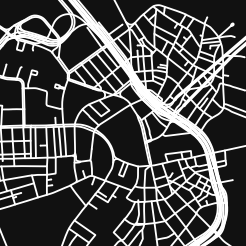

In [42]:
fp = plot_point("boston", (42.362084, -71.057267), "drive", 3.3)
Image(fp)

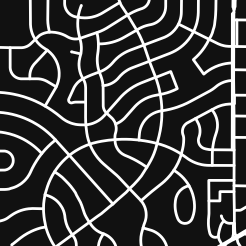

In [43]:
fp = plot_point("sacramento", (38.587193, -121.372872), "drive", 5)
Image(fp)

## Part II: Create diagrams for any city, by just passing in a place name

In [44]:
def plot_place(place, network_type="drive", default_width=4):
    img_folder = "images"
    extension = "png"
    dpi = 40
    fp = f"./{img_folder}/{place}.{extension}"
    G = ox.graph.graph_from_address(
        place, dist=1000, network_type=network_type, truncate_by_edge=True
    )
    fig, ax = ox.plot.plot_figure_ground(
        G=G,
        dist=805,
        default_width=default_width,
        filepath=fp,
        dpi=dpi,
        save=True,
        show=False,
        close=True,
    )
    return fp

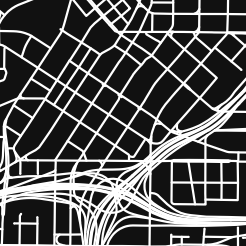

In [45]:
fp = plot_place("Atlanta, Georgia, USA")
Image(fp)

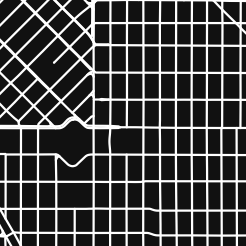

In [46]:
fp = plot_place("Denver, Colorado, USA")
Image(fp)

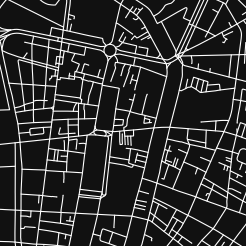

In [47]:
fp = plot_place("Sao Chingcha, Bangkok, Thailand", "drive", 2)
Image(fp)

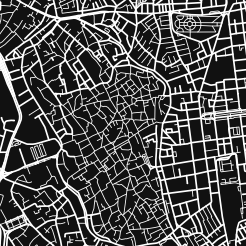

In [48]:
fp = plot_place("Medina of Tunis, Tunisia", "all", 3)
Image(fp)

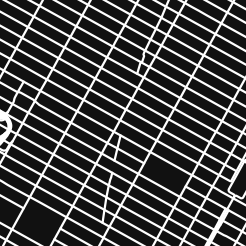

In [49]:
fp = plot_place("Times Square, New York, NY, USA")
Image(fp)

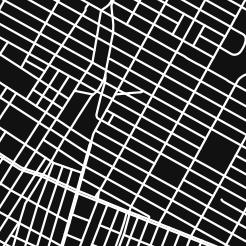

In [50]:
fp = plot_place("East Village, New York, NY, USA")
Image(fp)

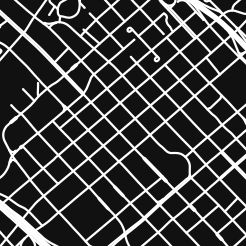

In [51]:
fp = plot_place("Charlotte, North Carolina, USA")
Image(fp)

## Part III: Configure street width pixels

OSMnx uses the `highway` OSM tag to ascribe street widths, in pixels. You can pass in a dictionary of street widths to override the default values. Any street type that does not appear as a key in the street widths dict falls back onto the `default_width` value.

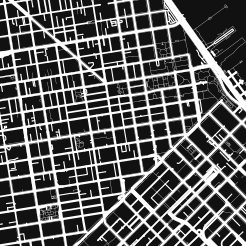

In [52]:
street_widths = {
    "footway": 0.5,
    "steps": 0.5,
    "pedestrian": 0.5,
    "path": 0.5,
    "track": 0.5,
    "service": 2,
    "residential": 3,
    "primary": 5,
    "motorway": 6,
}
point = (37.793897, -122.402189)
fp = "./images/sf_custom.png"
G = ox.graph.graph_from_point(point, dist=1000, network_type="all", truncate_by_edge=True)
fig, ax = ox.plot.plot_figure_ground(
    G=G,
    filepath=fp,
    street_widths=street_widths,
    default_width=4,
    dpi=40,
    save=True,
    show=False,
    close=True,
)
Image(fp)